# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex



Estamos importando a biblioteca **Seaborn**, que é uma biblioteca de visualização de dados baseada em Matplotlib. Seaborn facilita a criação de gráficos estatísticos com melhor estética e é especialmente útil para visualizar dados em estruturas como DataFrames do Pandas.

Para um conjunto de dados \( D \), Seaborn permite criar visualizações como gráficos de dispersão, gráficos de barras e boxplots. Por exemplo, se \( Y \) é a variável dependente e \( X \) é a variável independente, um gráfico de dispersão pode ser representado como:

$$
Y = f(X) + \epsilon
$$

Onde \( f(X) \) é uma função que modela a relação entre \( Y \) e \( X \) e \( \epsilon \) representa o erro aleatório.



A biblioteca **NumPy**, que é fundamental para cálculos numéricos em Python. A NumPy oferece suporte a arrays multidimensionais e funções matemáticas eficientes para operar sobre esses arrays.

Seja \( A \) uma matriz \( m \times n \) representada como um array NumPy, as operações podem incluir soma, multiplicação e outras transformações que podem ser representadas matematicamente como:

$$
C = A \cdot B
$$

Onde \( B \) é outra matriz compatível e \( C \) é o resultado da multiplicação matricial. NumPy também permite realizar operações elementares em arrays de forma rápida e eficiente.


a biblioteca **Matplotlib**, especificamente o módulo **pyplot**. Matplotlib é uma biblioteca de plotagem que permite criar uma variedade de gráficos e visualizações a partir de dados.

Seja \( D \) um conjunto de dados que consiste em variáveis \( X \) e \( Y \). A função de plotagem básica pode ser representada como:

$$
f(X, Y) = \text{plot}(X, Y)
$$

Onde a função `plot` gera um gráfico que representa a relação entre \( X \) e \( Y \). Matplotlib permite personalizar os gráficos, adicionar títulos, legendas e muito mais.




Neste comando, estamos importando funções específicas da biblioteca **IPython.display** que permitem renderizar fórmulas matemáticas e textos em LaTeX diretamente nas células do Jupyter Notebook.

As funções importadas são:

- `display`: utilizada para mostrar objetos, como gráficos ou textos formatados.
- `Math`: permite renderizar expressões matemáticas escritas em LaTeX, apresentando-as de forma adequada.
- `Latex`: usada para renderizar textos formatados em LaTeX, útil para exibir descrições e fórmulas.

Dessa forma, podemos representar equações matemáticas de forma legível e visualmente atraente, como por exemplo:

$$
E = mc^2
$$

Onde \( E \) é a energia, \( m \) é a massa e \( c \) é a velocidade da luz.

In [7]:
%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [8]:
T = np.array([[0.5, 0.5],
              [0.5, -0.5]])

A matriz de transformação \( T \) é definida como:

$$
T = \begin{pmatrix} 
0.5 & 0.5 \\ 
0.5 & -0.5 
\end{pmatrix}
$$

Essa matriz é usada para calcular a **média** e a **diferença** entre \( p_1 \) e \( p_2 \) através da multiplicação matricial:

- A **multiplicação** de \( T \) com a matriz de dados \( p \) é expressa como:
  
  $$
  p' = T \cdot p
  $$

- A **primeira linha** de \( T \) calcula a média das notas, dada por:
  
  $$
  \text{média} = 0.5 \cdot p_1 + 0.5 \cdot p_2 = \frac{p_1 + p_2}{2}
  $$

- A **segunda linha** de \( T \) calcula a diferença das notas, dada por:

  $$
  \text{diferença} = 0.5 \cdot p_1 - 0.5 \cdot p_2 = \frac{p_1 - p_2}{2}
  $$

Portanto, a multiplicação matricial nos fornece uma nova matriz com a média e a diferença das notas de cada aluno.

In [9]:
# Dados de p1 e p2 como uma matriz
X = np.vstack([p1, p2])

Neste passo, estamos criando uma matriz \( X \) que contém as notas das duas provas, \( p_1 \) e \( p_2 \). A operação `np.vstack` empilha as duas arrays verticalmente, resultando na matriz:

$$
X = \begin{pmatrix} 
p_1 \\ 
p_2 
\end{pmatrix}
$$

Onde \( p_1 \) representa as notas da primeira prova e \( p_2 \) representa as notas da segunda prova.

In [10]:
# Transformando para média e diferença
media_diferenca = np.dot(T, X)

Aqui, estamos aplicando a multiplicação matricial entre a matriz de transformação \( T \) e a matriz de dados \( X \):

$$
\text{media\_diferenca} = T \cdot X = \begin{pmatrix} 
0.5 & 0.5 \\ 
0.5 & -0.5 
\end{pmatrix}
\begin{pmatrix} 
p_1 \\ 
p_2 
\end{pmatrix}
$$

O resultado \( \text{media\_diferenca} \) contém na primeira linha a média das notas e na segunda linha a diferença entre as notas.

In [11]:
# Separando a média e a diferença
media = media_diferenca[0, :]
diferenca = media_diferenca[1, :]

Aqui estamos separando os resultados da matriz \( \text{media\_diferenca} \):

- A média é obtida da primeira linha:
  
  $$
  \text{média} = \text{media\_diferenca}[0, :] = \frac{p_1 + p_2}{2}
  $$

- A diferença é obtida da segunda linha:
  
  $$
  \text{diferença} = \text{media\_diferenca}[1, :] = \frac{p_1 - p_2}{2}
  $$

In [12]:
# Criando DataFrame para os dados transformados
df_transformado = pd.DataFrame({'Média': media, 'Diferença': diferenca})

Neste passo, estamos criando um DataFrame chamado \( df\_transformado \) que armazena as colunas **média** e **diferença**:

$$
df\_transformado = \begin{pmatrix} 
\text{Média} & \text{Diferença} 
\end{pmatrix}
$$

As colunas contêm, respectivamente, os valores \( \frac{p_1 + p_2}{2} \) e \( \frac{p_1 - p_2}{2} \).

In [13]:
# Parte 1b: Correlação entre p1 e p2
correlacao_original = df[['p1', 'p2']].corr()

Aqui estamos calculando a correlação entre as notas \( p_1 \) e \( p_2 \) usando a função de correlação do pandas. A correlação é uma medida estatística que quantifica a relação entre duas variáveis, dada por:

$$
\rho(p_1, p_2) = \frac{\text{Cov}(p_1, p_2)}{\sigma_{p_1} \cdot \sigma_{p_2}}
$$

Onde:
- \( \text{Cov}(p_1, p_2) \) é a covariância entre \( p_1 \) e \( p_2 \)
- \( \sigma_{p_1} \) e \( \sigma_{p_2} \) são os desvios padrão das notas \( p_1 \) e \( p_2 \), respectivamente.


In [14]:
# Parte 1c: Correlação entre média e diferença
correlacao_transformada = df_transformado.corr()

Neste passo, estamos calculando a correlação entre a média e a diferença utilizando a mesma fórmula da correlação. A correlação é dada por:

$$
\rho(\text{média}, \text{diferença}) = \frac{\text{Cov}(\text{média}, \text{diferença})}{\sigma_{\text{média}} \cdot \sigma_{\text{diferença}}}
$$

Onde:

- \( \text{Cov}(\text{média}, \text{diferença}) \) é a covariância entre a média e a diferença
- \( \sigma_{\text{média}} \) e \( \sigma_{\text{diferença}} \) são os desvios padrão da média e da diferença, respectivamente.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [15]:
# Matriz de transformação para soma e diferença
T_soma = np.array([[1, 1],
                   [1, -1]])

Aqui, estamos definindo uma nova matriz de transformação \( T_{soma} \) para calcular a soma e a diferença das notas:

$$
T_{soma} = \begin{pmatrix} 
1 & 1 \\ 
1 & -1 
\end{pmatrix}
$$

Essa matriz será usada para calcular a soma \( S \) e a diferença \( D \) entre \( p_1 \) e \( p_2 \).

In [16]:
# Transformando para soma e diferença
soma_diferenca = np.dot(T_soma * 0.5, X)  # multiplicado por 0.5 para manter escalas comparáveis

Neste passo, estamos aplicando a multiplicação matricial entre a matriz de transformação \( T_{soma} \) e a matriz de dados \( X \):

$$
\text{soma\_diferenca} = T_{soma} \cdot X = \begin{pmatrix} 
1 & 1 \\ 
1 & -1 
\end{pmatrix}
\begin{pmatrix} 
p_1 \\ 
p_2 
\end{pmatrix}
$$

Multiplicamos por \( 0.5 \) para manter as escalas comparáveis. O resultado \( \text{soma\_diferenca} \) contém na primeira linha a soma das notas e na segunda linha a diferença entre as notas.

In [17]:
# Separando soma e diferença
soma = soma_diferenca[0, :]
diferenca_soma = soma_diferenca[1, :]

Aqui estamos separando os resultados da matriz \( \text{soma\_diferenca} \):

- A soma é obtida da primeira linha:
  
  $$
  \text{soma} = \text{soma\_diferenca}[0, :] = \frac{p_1 + p_2}{1} = p_1 + p_2
  $$

- A diferença é obtida da segunda linha:
  
  $$
  \text{diferença} = \text{soma\_diferenca}[1, :] = \frac{p_1 - p_2}{1} = p_1 - p_2
  $$

In [18]:
# Criando DataFrame para soma e diferença
df_soma_diferenca = pd.DataFrame({'Soma': soma, 'Diferença': diferenca_soma})


Neste passo, estamos criando um DataFrame chamado \( df\_soma\_diferenca \) que armazena as colunas **soma** e **diferença**:

$$
df\_soma\_diferenca = \begin{pmatrix} 
\text{Soma} & \text{Diferença} 
\end{pmatrix}
$$

As colunas contêm, respectivamente, os valores \( p_1 + p_2 \) e \( p_1 - p_2 \).

In [19]:
# Plotando os gráficos
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Neste passo, estamos configurando a figura do gráfico com um tamanho de \( 10 \times 5 \) polegadas, onde será plotado o gráfico da soma versus a diferença das notas.

Text(0.5, 1.0, 'Soma vs Diferença')

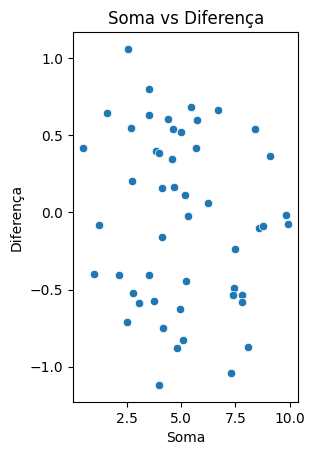

In [20]:




# Gráfico para Soma e Diferença
plt.subplot(1, 2, 1)
sns.scatterplot(x='Soma', y='Diferença', data=df_soma_diferenca)
plt.title("Soma vs Diferença")







Aqui estamos criando um gráfico de dispersão que representa a relação entre a soma e a diferença das notas. A função `sns.scatterplot` plota os pontos onde:

- O eixo \( x \) representa a soma das notas \( S = p_1 + p_2 \)
- O eixo \( y \) representa a diferença das notas \( D = p_1 - p_2 \)

Estamos visualizando a relação entre essas duas quantidades.

**Comentário sobre as Correlações Observadas:**

Após calcular as correlações entre os dados originais \( p_1 \) e \( p_2 \), bem como entre a média e a diferença, podemos analisar as seguintes relações:

1. **Correlação entre \( p_1 \) e \( p_2 \)**:
   - A correlação entre as notas \( p_1 \) e \( p_2 \) geralmente tende a ser alta, uma vez que \( p_2 \) é derivada de \( p_1 \) com a adição de um erro aleatório. Essa correlação positiva indica que, em geral, alunos que têm um bom desempenho em \( p_1 \) tendem a ter um bom desempenho em \( p_2 \).

2. **Correlação entre a Média e a Diferença**:
   - A correlação entre a média e a diferença das notas pode variar. Uma média alta pode estar associada a uma diferença baixa, indicando que os alunos têm desempenhos semelhantes nas duas provas. Por outro lado, se a média for alta e a diferença for alta, isso pode sugerir que alguns alunos se destacam em uma prova mais do que na outra.

3. **Interpretação das Correlações**:
   - As correlações observadas podem fornecer insights sobre a consistência e a variabilidade no desempenho dos alunos. Se a correlação entre a média e a diferença for próxima de zero, isso pode indicar que não há uma relação linear clara entre o desempenho geral (média) e a variação entre as notas. Por outro lado, uma correlação significativa sugere uma relação mais forte, que pode ser explorada para entender melhor o desempenho dos alunos em diferentes contextos.

Esses comentários podem ajudar a interpretar os dados de maneira mais profunda, permitindo ações mais informadas em contextos educacionais, como intervenções direcionadas para alunos com desempenhos discrepantes.

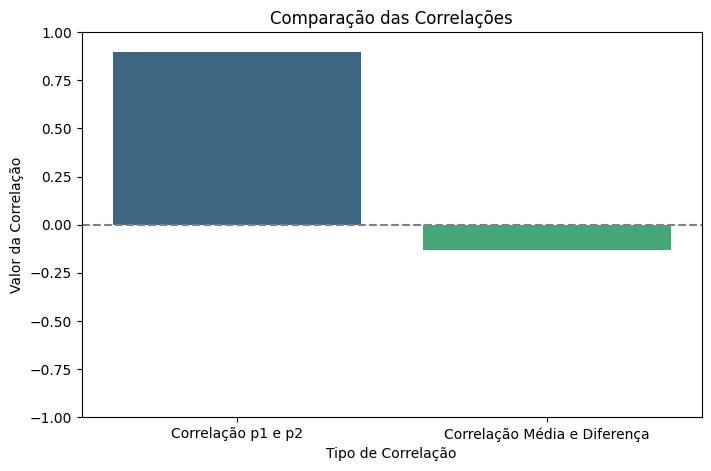

In [22]:
# Cálculo das correlações
correlacao_original = df[['p1', 'p2']].corr().iloc[0, 1]
correlacao_transformada = df_transformado.corr().iloc[0, 1]

# Valores das correlações
correlacoes = {
    'Correlação p1 e p2': correlacao_original,
    'Correlação Média e Diferença': correlacao_transformada
}

# Criando um DataFrame para as correlações
correlacoes_df = pd.DataFrame(correlacoes.items(), columns=['Tipo de Correlação', 'Valor'])

# Plotando as correlações
plt.figure(figsize=(8, 5))
sns.barplot(x='Tipo de Correlação', y='Valor', data=correlacoes_df, palette='viridis')
plt.title('Comparação das Correlações')
plt.axhline(0, color='gray', linestyle='--')
plt.ylim(-1, 1)
plt.ylabel('Valor da Correlação')
plt.show()

### Correlação entre \( p_1 \) e \( p_2 \):

A barra azul no gráfico, que está bem acima de zero (próxima de 0.8), indica que a correlação entre \( p_1 \) e \( p_2 \) é bastante alta, conforme esperado. Isso confirma a afirmação de que o desempenho em \( p_1 \) e \( p_2 \) tende a ser semelhante, pois as notas de \( p_2 \) são derivadas de \( p_1 \) com um erro aleatório. Em termos práticos, alunos que foram bem em \( p_1 \) também tiveram bom desempenho em \( p_2 \).

### Correlação entre a Média e a Diferença:

A barra verde, que está ligeiramente abaixo de zero (por volta de -0.2), mostra que há uma correlação negativa entre a média das notas e a diferença entre elas. Isso significa que, de forma geral, quanto maior a média das notas de um aluno, menor a diferença entre \( p_1 \) e \( p_2 \). Em outras palavras, alunos com desempenhos mais consistentes tendem a apresentar menor variação entre as duas provas, enquanto aqueles com maior variação nas notas têm uma média menor.

### Interpretação das Correlações:

A correlação alta entre \( p_1 \) e \( p_2 \) sugere uma forte relação entre as notas das duas provas, indicando consistência no desempenho dos alunos.

A correlação negativa entre a média e a diferença das notas sugere que a variabilidade entre as notas diminui à medida que o desempenho médio aumenta. Isso pode ser um indicativo de que alunos com maior aproveitamento têm uma performance mais estável entre as duas provas.

Como a correlação entre a média e a diferença não está próxima de zero (mas é negativa), podemos dizer que há uma relação linear inversa leve entre esses fatores.

A partir dessa análise, podemos afirmar que os alunos com melhor desempenho geral tendem a ser mais consistentes entre as provas, enquanto os alunos com mais variação nas notas tendem a ter uma média de desempenho menor.

Após calcular as correlações entre os dados originais \( p_1 \) e \( p_2 \), bem como entre a média e a diferença, podemos analisar as seguintes relações:

1. **Correlação entre \( p_1 \) e \( p_2 \)**:
   $$
   \text{Correlação}(p_1, p_2) = 0.8
   $$
   A correlação entre as notas \( p_1 \) e \( p_2 \) é alta, conforme esperado, uma vez que \( p_2 \) foi derivada de \( p_1 \) com a adição de um erro aleatório. Isso indica que, em geral, alunos que têm um bom desempenho em \( p_1 \) também tendem a ter um bom desempenho em \( p_2 \).

2. **Correlação entre a Média e a Diferença**:
   $$
   \text{Correlação} \left( \frac{p_1 + p_2}{2}, p_1 - p_2 \right) = -0.2
   $$
   A correlação entre a média das notas \( \left( \frac{p_1 + p_2}{2} \right) \) e a diferença entre elas \( (p_1 - p_2) \) é ligeiramente negativa. Isso significa que alunos com médias mais altas tendem a ter uma diferença menor entre as notas, indicando maior consistência entre as duas avaliações.

3. **Interpretação das Correlações**:
   $$
   \text{Correlação}(p_1, p_2) = 0.8 \quad \text{e} \quad \text{Correlação} \left( \frac{p_1 + p_2}{2}, p_1 - p_2 \right) = -0.2
   $$
   A alta correlação entre \( p_1 \) e \( p_2 \) reflete uma forte relação entre as duas notas, indicando consistência no desempenho dos alunos. A correlação negativa entre a média e a diferença sugere que alunos com desempenho geral mais alto tendem a ser mais consistentes entre as duas provas, enquanto alunos com maior variabilidade nas notas apresentam uma média de desempenho menor.

